In [1]:
# @toffanetto
import numpy as np
import logistic_regression_classification as cl
import matplotlib.pyplot as plt

/home/toffanetto/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Getting train data
X_train, y_train, classes_rate_train = cl.getData(train=True, raw= False)

# Getting test data
X_test, y_test, classes_rate_test = cl.getData(train=False, raw= False)

In [13]:
# Training

# Select number of epochs and weights iteration in batch or step-by-step
EPOCHS = 1000
BATCH = 500 # 0 for batch or type mini-batch size

W, BA_train, BA_val, J_train, J_val = cl.trainClassifier(X=X_train,y=y_train,epochs=EPOCHS,batch=BATCH,classes_rate=classes_rate_train)


In [14]:
np.save('../model/W_'+str(EPOCHS)+'_epochs_batch_size'+str(BATCH)+'.npy', W)

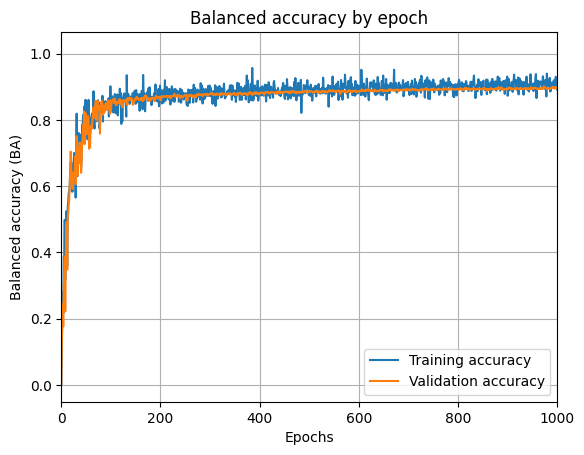

In [15]:
n = np.linspace(0,EPOCHS,len(BA_val))

plt.figure()
plt.plot(BA_train, label='Training accuracy')
plt.plot(BA_val, label='Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Balanced accuracy (BA)")
plt.title("Balanced accuracy by epoch")
plt.legend(loc='lower right')
plt.xlim([0,EPOCHS])
plt.grid()
plt.savefig('../plot/LR_1/BA_'+str(EPOCHS)+'_epochs_batch_size'+str(BATCH)+'.pdf', format="pdf", bbox_inches="tight")

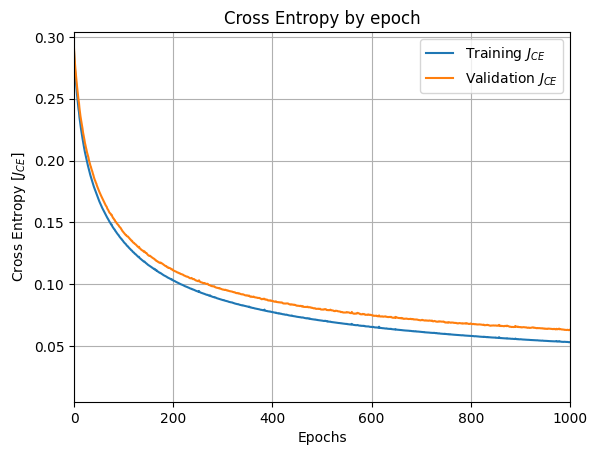

In [16]:
plt.figure()
plt.plot(J_train, label=r'Training $J_{CE}$')
plt.plot(J_val, label=r'Validation $J_{CE}$')
plt.xlabel("Epochs")
plt.ylabel(r"Cross Entropy [$J_{CE}$]")
plt.title("Cross Entropy by epoch")
plt.legend(loc='upper right')
plt.xlim([0,EPOCHS])
plt.grid()
plt.savefig('../plot/LR_1/CE_'+str(EPOCHS)+'_epochs_batch_size'+str(BATCH)+'.pdf', format="pdf", bbox_inches="tight")

In [17]:
# Testing

y_test_hat, class_y_hat = cl.classify(x=X_test,W=W)

confusion_matrix, ba = cl.rateModel(y=y_test, y_hat=class_y_hat, classes_rate=classes_rate_test)

s = 'Confusion Matrix: \n'+str(confusion_matrix)+'\nBA = '+str(ba)

try:
    f = open('../plot/LR_1/output_'+str(EPOCHS)+'_epochs_batch_size'+str(BATCH)+'.txt', "x")
except:
    f = open('../plot/LR_1/output_'+str(EPOCHS)+'_epochs_batch_size'+str(BATCH)+'.txt', "w")
f.write(s)
f.close()

print(s)

Confusion Matrix: 
[[484.   0.  12.   0.   0.   0.]
 [ 26. 444.   1.   0.   0.   0.]
 [ 31.  48. 341.   0.   0.   0.]
 [  0.   2.   0. 427.  62.   0.]
 [  0.   0.   0.  29. 503.   0.]
 [  0.   0.   0.   0.   0. 537.]]
BA = 0.9242548103964365
